In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy import stats
import numpy as np

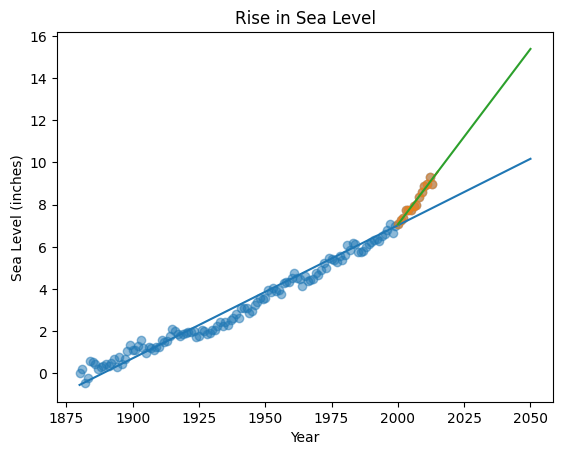

In [39]:
def seaLevelPredictor(): 
    df = pd.read_csv('epa-sea-level.csv')
    # Create scatter plot
    df_x = df[df['Year'] >= 2000]

    # Year column
    x = df['Year']

    # CSIRO Adjusted Sea Level
    y = df['CSIRO - Adjusted sea level (inches)']

    # Scatter plot using the year column and CSIRO Sea level 
    plt.scatter(x = x, y = y, alpha = 0.5);

    # Masking the two columns to remove NAN values
    mask = ~np.isnan(x) & ~np.isnan(y)
    # Calculate a linear least-squares regression for two sets of measurements --> it gives intercept, rvalue, pvalue, slope, standard deviation error etc
    result = stats.linregress(x[mask], y[mask])
    # Slope andd intercept of the line of best fit
    slope = result.slope
    intercept = result.intercept
    # Extend the year to 2050
    year_range = list(range(2016, 2051))
    year_range = pd.Series(year_range)
    x = x._append(year_range)
    # Create first line of best fit
    plt.plot(x, result.intercept + result.slope * x);
    # Data from year 2000 through the most recent year 
    x_ = df_x["Year"]
    y_= df_x["CSIRO - Adjusted sea level (inches)"]
    # Scatter plot using the year column and CSIRO Sea level 
    plt.scatter(x = x_, y = y_, alpha = 0.5);
    # Masking the two columns to remove NAN values
    mask = ~np.isnan(x_) & ~np.isnan(y_)
    # Calculate a linear least-squares regression for two sets of measurements --> it gives intercept, rvalue, pvalue, slope, standard deviation error etc
    res = stats.linregress(x_[mask], y_[mask])
    plt.plot(x_, res.intercept + res.slope * x_ );
    # Extend the year to 2050
    year_range = list(range(2016, 2051))
    year_range = pd.Series(year_range)
    new_x = x_._append(year_range)
    # Create first line of best fit
    plt.plot(new_x, res.intercept + res.slope * new_x);
    # Add labels and title
    plt.xlabel('Year');
    plt.ylabel('Sea Level (inches)')
    plt.title('Rise in Sea Level')
    plt.savefig('sea_level_plot.png')
    #return plt.gca();
seaLevelPredictor()